In [7]:
import numpy as np
import openpyxl
from sklearn.preprocessing import MinMaxScaler
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
DATA_PATH_1 = './csv_data/INS-W_1/'

q = (
    pl.scan_csv(DATA_PATH_1 + 'FeatureData/sleep.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop("")
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
    .select(pl.exclude(pl.String))
)

q_dep = (
    pl.scan_csv(DATA_PATH_1 + 'SurveyData/dep_endterm.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
)

sleep1 = q.collect()
dep_1 = q_dep.collect()
# dep_1 = dep_1.to_dummies(columns="dep", drop_first=False)

scaler = MinMaxScaler()
# temp = pl.from_numpy(
#     scaler.fit_transform(sleep1.select(pl.exclude([pl.Date, pl.Int32]))), schema=sleep1.select(pl.exclude([pl.Date, pl.Int32])).columns
#     )

# sleep1 = sleep1.select(["pid", "date"])
# sleep1 = sleep1.hstack(temp)
sleep1 = sleep1.join(dep_1, on="pid", how="inner")

In [19]:
DATA_PATH_2 = './csv_data/INS-W_2/'

q = (
    pl.scan_csv(DATA_PATH_1 + 'FeatureData/sleep.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop("")
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
    .select(pl.exclude(pl.String))
)

q_dep = (
    pl.scan_csv(DATA_PATH_1 + 'SurveyData/dep_endterm.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop(["","BDI2"])
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})

)

temp = q.collect()
dep_2 = q_dep.collect()

sleep2 = pl.from_numpy(
    scaler.fit_transform(temp.select(pl.exclude([pl.Date, pl.Int32]))), schema=temp.select(pl.exclude([pl.Date, pl.Int32])).columns
    )

del temp

In [20]:
DATA_PATH_3 = './csv_data/INS-W_3/'

q = (
    pl.scan_csv(DATA_PATH_1 + 'FeatureData/sleep.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop("")
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
    .select(pl.exclude(pl.String))
)

q_dep = (
    pl.scan_csv(DATA_PATH_1 + 'SurveyData/dep_endterm.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop(["","BDI2"])
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})

)

temp = q.collect()
dep_3 = q_dep.collect()

sleep3 = pl.from_numpy(
    scaler.fit_transform(temp.select(pl.exclude([pl.Date, pl.Int32]))), schema=temp.select(pl.exclude([pl.Date, pl.Int32])).columns
    )

del temp

In [113]:
DATA_PATH_4 = './csv_data/INS-W_4/'

q4 = (
    pl.scan_csv(DATA_PATH_4 + 'FeatureData/sleep.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .drop("")
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
    .select(pl.exclude(pl.String))
)

q_dep4 = (
    pl.scan_csv(DATA_PATH_4 + 'SurveyData/dep_endterm.csv')
    .select(pl.col("*"))
    .cast({"date": pl.Date})
    .with_columns(pl.col("pid").str.replace_all("INS-W_",""))
    .cast({"pid": pl.Int32})
)

sleep4 = q4.collect()
dep_4 = q_dep4.collect()
# dep_1 = dep_1.to_dummies(columns="dep", drop_first=False)

# scaler = MinMaxScaler()
# temp = pl.from_numpy(
#     scaler.fit_transform(sleep1.select(pl.exclude([pl.Date, pl.Int32]))), schema=sleep1.select(pl.exclude([pl.Date, pl.Int32])).columns
#     )

# sleep1 = sleep1.select(["pid", "date"])
# sleep1 = sleep1.hstack(temp)
sleep4 = sleep4.join(dep_4, on="pid", how="inner")

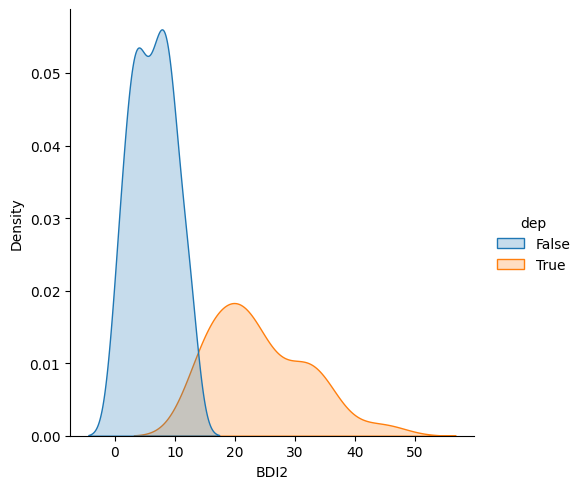

In [74]:
dep_1_BDI2 = sns.displot(x="BDI2", data=dep_1, hue="dep", kind="kde", fill=True)

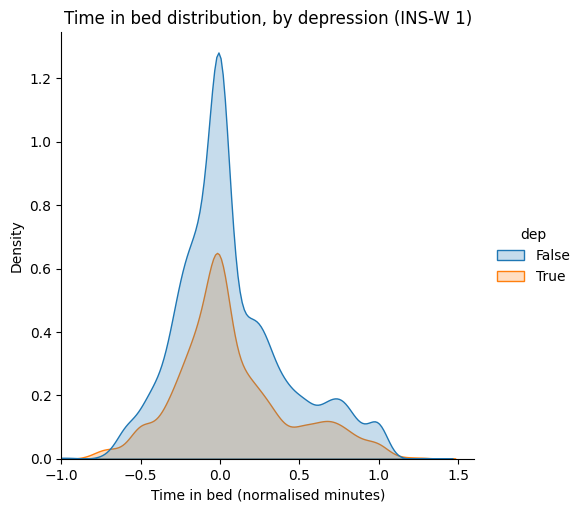

In [152]:
time_in_bed_1 = sns.displot(data=sleep1, x="f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:14dhist", hue="dep", kind="kde", fill=True)
time_in_bed_1.set(
    xlim=(-1, 1.6),
    title="Time in bed distribution, by depression (INS-W 1)",
    xlabel="Time in bed (normalised minutes)",
    )
time_in_bed_1.savefig("./figures/time_in_bed_1.png")

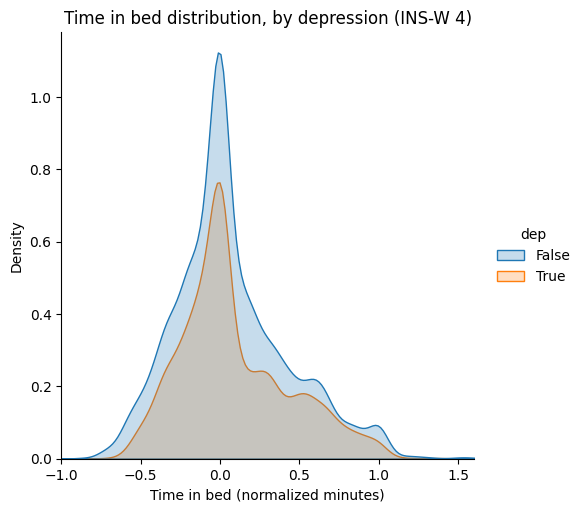

In [153]:
time_in_bed_4 = sns.displot(data=sleep4, x="f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:14dhist", hue="dep", kind="kde", fill=True)
time_in_bed_4.set(
    xlim=(-1, 1.6),
    title="Time in bed distribution, by depression (INS-W 4)",
    xlabel="Time in bed (normalized minutes)",
    )
time_in_bed_4.savefig("./figures/time_in_bed_4.png")

In [198]:
sleep1_dep_true = sleep1.filter(pl.col("dep") == "true")
sleep4_dep_true = sleep4.filter(pl.col("dep") == "true")
sleep1_dep_false = sleep1.filter(pl.col("dep") == "false")
sleep4_dep_false = sleep4.filter(pl.col("dep") == "false")

In [181]:
print([sleep1_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:14dhist") > 0.25).height / sleep1_dep_true.height, sleep1_dep_true.height/ sleep1.height])

[0.18627450980392157, 0.3591549295774648]


In [ ]:
print(sleep4_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:14dhist") > 0.25).height / sleep4_dep_true.height)

0.19494123658661217


In [230]:
print(sleep1_dep_false.height/sleep1.height)

0.6408450704225352


In [231]:
print(sleep4_dep_false.height/sleep4.height)

0.5978835978835979


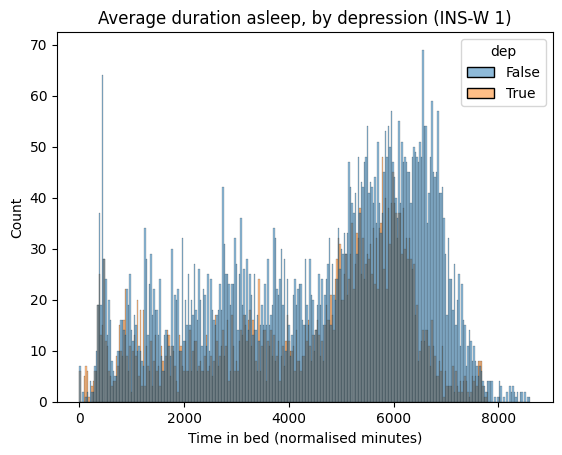

In [168]:

avg_dur_asleep_1 = sns.histplot(data=sleep1, x="f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:14dhist", hue="dep", bins=300).set(
    # xlim=(-1, 1.6),
    title="Average duration asleep, by depression (INS-W 1)",
    xlabel="Time in bed (normalised minutes)",
    )
# time_in_bed_1.savefig("./figures/time_in_bed_1.png")

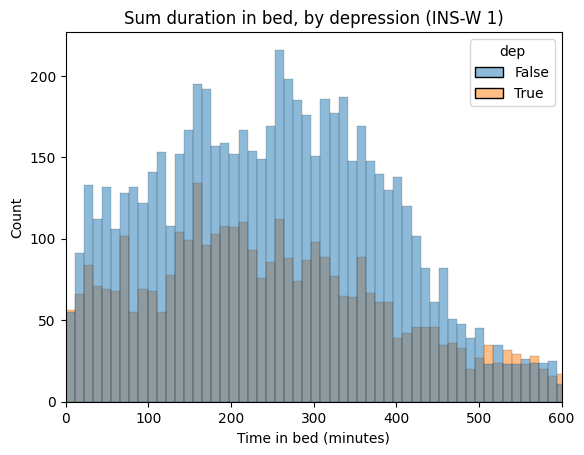

In [177]:
awake_in_bed_1 = sns.histplot(data=sleep1, x="f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist", hue="dep", bins=300)
awake_in_bed_1.set(
    xlim=(0, 600),
    title="Sum duration in bed, by depression (INS-W 1)",
    xlabel="Time in bed (minutes)",
    )
awake_in_bed_1.figure.savefig("./figures/awake_in_bed_1.png")

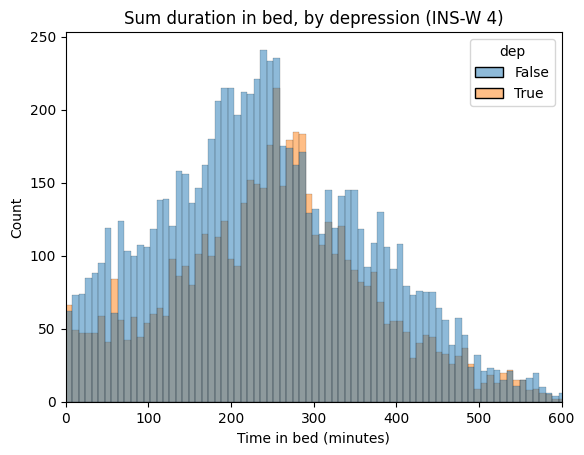

In [176]:

awake_in_bed_4 = sns.histplot(data=sleep4, x="f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist", hue="dep", bins=300)
awake_in_bed_4.set(
    xlim=(0, 600),
    title="Sum duration in bed, by depression (INS-W 4)",
    xlabel="Time in bed (minutes)",
    )
awake_in_bed_4.figure.savefig("./figures/awake_in_bed_4.png")

In [202]:
print(sleep1_dep_true.select(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist")).describe())

shape: (9, 2)
┌────────────┬─────────────────────────────────┐
│ statistic  ┆ f_slp:fitbit_sleep_summary_rap… │
│ ---        ┆ ---                             │
│ str        ┆ f64                             │
╞════════════╪═════════════════════════════════╡
│ count      ┆ 3653.0                          │
│ null_count ┆ 1039.0                          │
│ mean       ┆ 258.522858                      │
│ std        ┆ 172.504788                      │
│ min        ┆ 0.0                             │
│ 25%        ┆ 141.0                           │
│ 50%        ┆ 236.0                           │
│ 75%        ┆ 356.0                           │
│ max        ┆ 1899.0                          │
└────────────┴─────────────────────────────────┘


In [203]:
print(sleep4_dep_true.select(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist")).describe())

shape: (9, 2)
┌────────────┬─────────────────────────────────┐
│ statistic  ┆ f_slp:fitbit_sleep_summary_rap… │
│ ---        ┆ ---                             │
│ str        ┆ f64                             │
╞════════════╪═════════════════════════════════╡
│ count      ┆ 5642.0                          │
│ null_count ┆ 2186.0                          │
│ mean       ┆ 264.952145                      │
│ std        ┆ 183.721227                      │
│ min        ┆ 0.0                             │
│ 25%        ┆ 170.0                           │
│ 50%        ┆ 255.0                           │
│ 75%        ┆ 329.0                           │
│ max        ┆ 1984.0                          │
└────────────┴─────────────────────────────────┘


In [213]:
print(sleep1_dep_false.select(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist")).describe())

shape: (9, 2)
┌────────────┬─────────────────────────────────┐
│ statistic  ┆ f_slp:fitbit_sleep_summary_rap… │
│ ---        ┆ ---                             │
│ str        ┆ f64                             │
╞════════════╪═════════════════════════════════╡
│ count      ┆ 6721.0                          │
│ null_count ┆ 1651.0                          │
│ mean       ┆ 304.826514                      │
│ std        ┆ 334.137774                      │
│ min        ┆ 0.0                             │
│ 25%        ┆ 150.0                           │
│ 50%        ┆ 260.0                           │
│ 75%        ┆ 365.0                           │
│ max        ┆ 3303.0                          │
└────────────┴─────────────────────────────────┘


In [214]:
print(sleep4_dep_false.select(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist")).describe())

shape: (9, 2)
┌────────────┬─────────────────────────────────┐
│ statistic  ┆ f_slp:fitbit_sleep_summary_rap… │
│ ---        ┆ ---                             │
│ str        ┆ f64                             │
╞════════════╪═════════════════════════════════╡
│ count      ┆ 8372.0                          │
│ null_count ┆ 3267.0                          │
│ mean       ┆ 259.631749                      │
│ std        ┆ 198.553272                      │
│ min        ┆ 0.0                             │
│ 25%        ┆ 153.0                           │
│ 50%        ┆ 238.0                           │
│ 75%        ┆ 337.0                           │
│ max        ┆ 2355.0                          │
└────────────┴─────────────────────────────────┘


In [204]:
print([
    sleep1_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist") > 258).height / sleep1_dep_true.height,
    sleep4_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist") > 264).height / sleep4_dep_true.height
    ])

[0.3523017902813299, 0.32996934082779766]


In [ ]:
print([
    sleep1_dep_false.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist") < 238 ).height / sleep1_dep_false.height,
    sleep4_dep_false.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist") < 260).height / sleep4_dep_false.height
])

[0.48972766364070713, 0.4154136953346507]


In [ ]:
print([
    sleep1_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist").is_between()).height / sleep1_dep_true.height,
    sleep4_dep_true.filter(pl.col("f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist").is_between(170,329)).height / sleep4_dep_true.height
    ])

[0.39215686274509803, 0.3616504854368932]
